In [ ]:
# This is the data of an online retailing company where they are trying to find which online 
# shopper will generate revenue by his/her online shoppers’ activity on their site.


In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  # to ignore the warnings

C:\Users\priya\anacondanew3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\priya\anacondanew3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\priya\anacondanew3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Get the current working directory
os.getcwd()

'C:\\Users\\priya\\Learnbay\\Project for Placement\\ML Project'

In [3]:
# import the dataset
df=pd.read_csv('online_shoppers_intention (1).csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Dataset Details: There are 12330 records and 18 features
df.shape

(12330, 18)

In [5]:
# # Dataset informatiion:
# 1-Administrative:Categorical-Page Name
# 2-Administrative_Duration:Continous-Duration of stay in that Page
# 3-Informational:Categorical-Page Name
# 4-Informational_Duration:Continous-Duration of stay in that Page
# 5-ProductRelated: Continous- No. of products related pages
# 6-ProductRelated_Duration:Continous-Duration of stay in that page(Min)
# 7-BounceRates in %:Continous-Bounce rate is a metric that measures the percentage of visitors to a website who navigate
#     away from the site after viewing only one page. A high bounce rate indicates that visitors are not finding the content
#     or resources they are looking for on the site."
# 8-ExitRates in %:Continous-Exit rate is a metric that measures the percentage of visitors who leave a website from a specific page,
#     rather than continuing to view other pages on the site. A high exit rate on a specific page may indicate that the page
#     is not providing the information or resources that visitors are looking for, or that there are issues with the design
#     or functionality of the page.
# 9-PageValues:Continous-Page value can be used to determine which pages on a website are the most valuable in terms of generating 
#     revenue or conversions. It can also be used to identify pages that may be underperforming and in need of optimization.
#     It should be used together with other metrics, as it only gives the average value of a page but it doesn't indicate 
#     how many people are actually converting or how many of them have a high or low lifetime value"
# 10-SpecialDay (probability): Categorical- Special Day probabbility
# 11-Month:-Categorical- Month customer visied
# 12-OperatingSystems:Categorical- OS used by the customer
# 13-Browser: Categorical-Browser used by customer
# 14-Region: Categorical-region of the customer
# 15-TrafficType: Categorical- How the traffic is coming i.e direct, referral, organic, social, paid traffic etc
# 16-VisitorType:Categorical- First time visitor, returning visitor, others
# 17-Weekend:Categorical- Whether the Customer visited on weekend or not
# 18-Revenue:Target Column(Categorical): Customer Generated revenue or not (T/F)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [7]:
# Check for null values- We can see there are no null values
df.isnull().any()

Administrative              False
Administrative_Duration     False
Informational               False
Informational_Duration      False
ProductRelated              False
ProductRelated_Duration     False
BounceRates in %            False
ExitRates in %              False
PageValues                  False
SpecialDay (probability)    False
Month                       False
OperatingSystems            False
Browser                     False
Region                      False
TrafficType                 False
VisitorType                 False
Weekend                     False
Revenue                     False
dtype: bool

In [8]:
# Understand the column data i.e different unique values oln contains
df.nunique()

Administrative                27
Administrative_Duration     3335
Informational                 17
Informational_Duration      1258
ProductRelated               311
ProductRelated_Duration     9551
BounceRates in %            1872
ExitRates in %              4777
PageValues                  2704
SpecialDay (probability)       6
Month                         10
OperatingSystems               8
Browser                       13
Region                         9
TrafficType                   20
VisitorType                    3
Weekend                        2
Revenue                        2
dtype: int64

In [9]:
df['VisitorType'].value_counts()
# We can see mostly there are returning customers

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [10]:
# Reading one of the record
df.loc[2939]

Administrative                             12
Administrative_Duration                 331.3
Informational                               0
Informational_Duration                    0.0
ProductRelated                            206
ProductRelated_Duration           9997.728571
BounceRates in %                      0.00144
ExitRates in %                       0.010741
PageValues                          26.023771
SpecialDay (probability)                  0.0
Month                                     May
OperatingSystems                            2
Browser                                     2
Region                                      1
TrafficType                                 1
VisitorType                 Returning_Visitor
Weekend                                 False
Revenue                                 False
Name: 2939, dtype: object

In [11]:
# View the statistical Details
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
# # Insights
# 1) For for Informational and Informational_Duration the 25,50 and 75%ile value is zero 
#     implies users are not much interested in the infomational pages
# 2) For PageValues the 25,50 and 75%ile value is zero implies most of the users are not having any traffic ## DOubt
# 3) For Special_day the 25,50 and 75%ile value is zero which means the traffic is very less on the special days 
# 4) for Browser 25,50 and 75%ile value is 2 that means most of the traffic is coming from 2 Browser

In [13]:
df['Informational_Duration'].value_counts()
# We can see that there are 9925 records with Zero value

0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informational_Duration, Length: 1258, dtype: int64

In [14]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

### EDA- Exploratory Data Analysis

#### Univariate Analysis

In [5]:
# Function to plot count plots and the calculate the percent split of various categorical columns
def plot_count_plot(DF,feature,figsize=(10,6),hue=None):
    plt.figure(figsize=figsize)
    ax=sns.countplot(data=DF,x=feature)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()
    print('Percent Share of each Category is:')
    print((DF[feature].value_counts(normalize=True)*100).round(2))
    

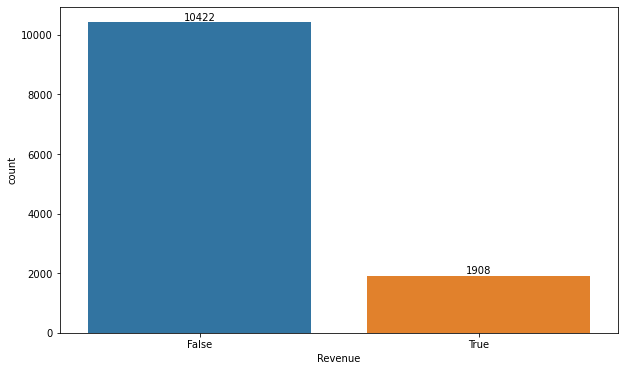

Percent Share of each Category is:
False    84.53
True     15.47
Name: Revenue, dtype: float64


In [6]:
plot_count_plot(df,'Revenue')
# Insight- Only approx 15.5% of the person are contributing to the revenue or we can say the conversion rate os 15.5%. 
## We can also say the data is highly imbalanced.

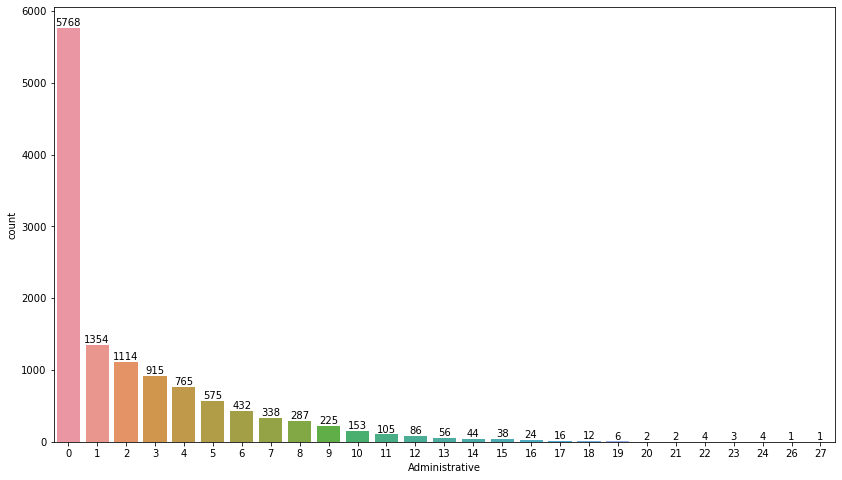

Percent Share of each Category is:
0     46.78
1     10.98
2      9.03
3      7.42
4      6.20
5      4.66
6      3.50
7      2.74
8      2.33
9      1.82
10     1.24
11     0.85
12     0.70
13     0.45
14     0.36
15     0.31
16     0.19
17     0.13
18     0.10
19     0.05
24     0.03
22     0.03
23     0.02
21     0.02
20     0.02
27     0.01
26     0.01
Name: Administrative, dtype: float64


In [17]:
plot_count_plot(df,'Administrative',figsize=(14,8))
# Insights- about 46.8% of the users are visiting Page 0 for administrative 

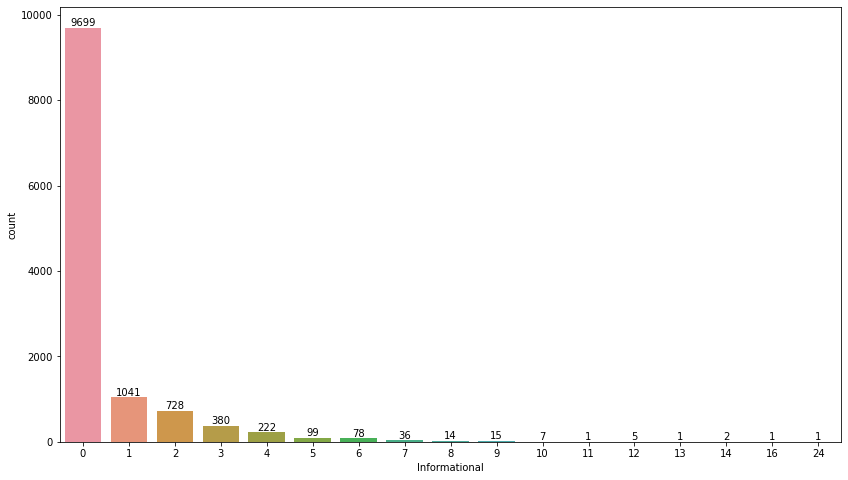

Percent Share of each Category is:
0     78.66
1      8.44
2      5.90
3      3.08
4      1.80
5      0.80
6      0.63
7      0.29
9      0.12
8      0.11
10     0.06
12     0.04
14     0.02
16     0.01
11     0.01
24     0.01
13     0.01
Name: Informational, dtype: float64


In [18]:
plot_count_plot(df,'Informational',figsize=(14,8))
# Insights- most of the Users tend to visit information Page 0 i.e 78.66% approx
# On few infomation pages there are no views i.e 15,17,18 etc

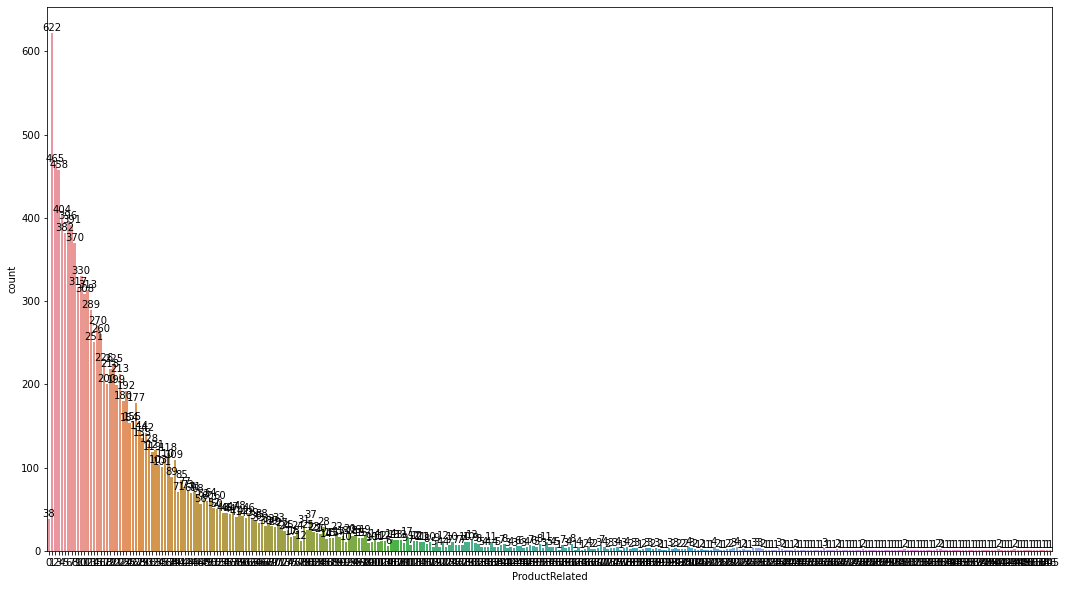

Percent Share of each Category is:
1      5.04
2      3.77
3      3.71
4      3.28
6      3.21
       ... 
243    0.01
409    0.01
262    0.01
414    0.01
192    0.01
Name: ProductRelated, Length: 311, dtype: float64


In [19]:
plot_count_plot(df,'ProductRelated',figsize=(18,10))
# Insights- Visits for product related pages is distributed

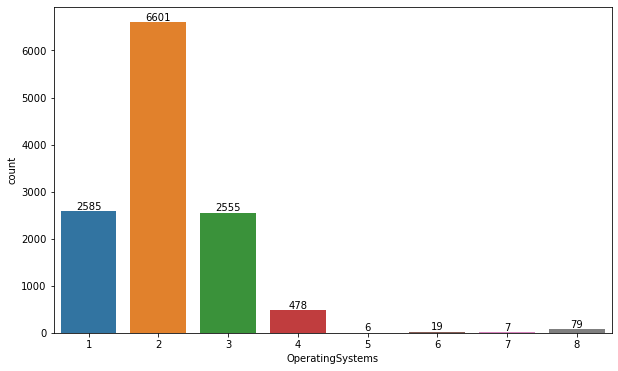

Percent Share of each Category is:
2    53.54
1    20.97
3    20.72
4     3.88
8     0.64
6     0.15
7     0.06
5     0.05
Name: OperatingSystems, dtype: float64


In [20]:
plot_count_plot(df,'OperatingSystems')
# Insights- MOre than 50% of the users are using OS-2 
# About 95% of the users are from three OS-1,2,3
# We can drop this column as OS indicates the user of specific type of computer eg. windows mac etc but it will 
# not be dependent on the revenue generation 

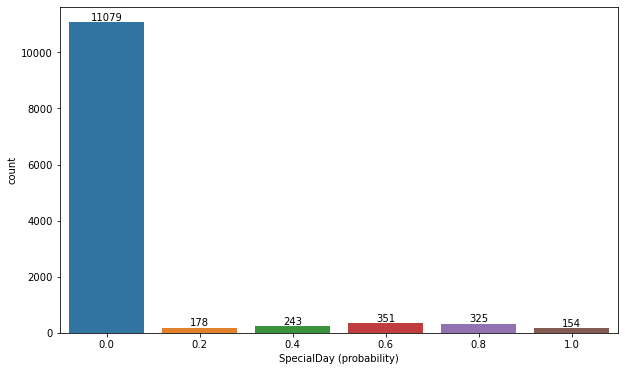

Percent Share of each Category is:
0.0    89.85
0.6     2.85
0.8     2.64
0.4     1.97
0.2     1.44
1.0     1.25
Name: SpecialDay (probability), dtype: float64


In [21]:
plot_count_plot(df,'SpecialDay (probability)')
# Insights- Approx 90% of the traffic is not on the special days

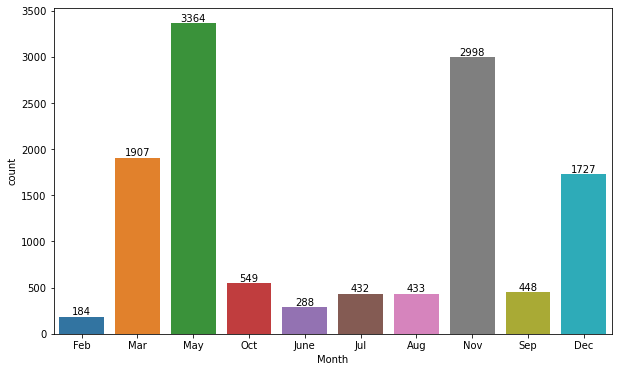

Percent Share of each Category is:
May     27.28
Nov     24.31
Mar     15.47
Dec     14.01
Oct      4.45
Sep      3.63
Aug      3.51
Jul      3.50
June     2.34
Feb      1.49
Name: Month, dtype: float64


In [22]:
plot_count_plot(df,'Month')
# Insights- More than 80% of the traffic is in 4 months i.e. May,Nov,Mar,Dec

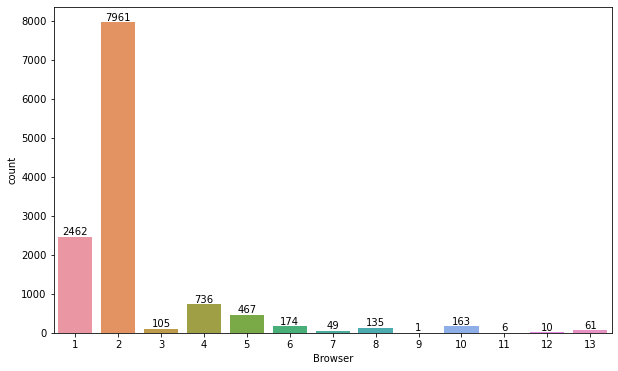

Percent Share of each Category is:
2     64.57
1     19.97
4      5.97
5      3.79
6      1.41
10     1.32
8      1.09
3      0.85
13     0.49
7      0.40
12     0.08
11     0.05
9      0.01
Name: Browser, dtype: float64


In [23]:
plot_count_plot(df,'Browser')
# Insights- About 85% of the users are coming from 2 browsers only i.e 64.5% from browser-2 and 20% from browser-1
# We can drop Browser column as browser is also a user choice but it will not be helpful in predicting if a user coming
# from a specific browser can generate revenue. Also most of the times browser and OS are related and they are more 
# of a user choice so these are insignificant.

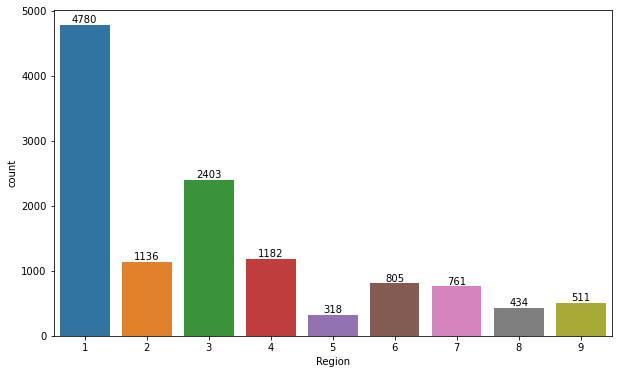

Percent Share of each Category is:
1    38.77
3    19.49
4     9.59
2     9.21
6     6.53
7     6.17
9     4.14
8     3.52
5     2.58
Name: Region, dtype: float64


In [24]:
plot_count_plot(df,'Region')
# Insights Almost 39% of the user are from region-1 and approx 20% are from region-3

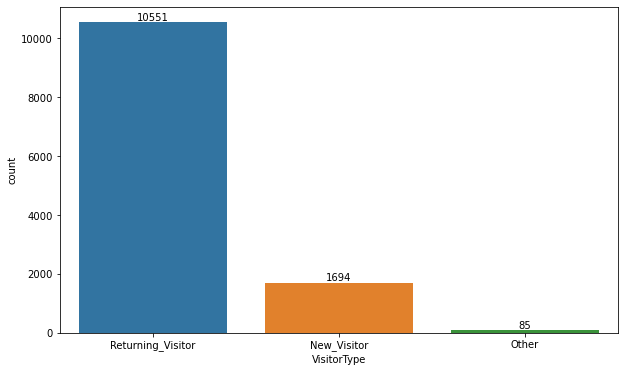

Percent Share of each Category is:
Returning_Visitor    85.57
New_Visitor          13.74
Other                 0.69
Name: VisitorType, dtype: float64


In [25]:
plot_count_plot(df,'VisitorType')
# Insights- 85.5% of the customers returns to site which is a good indication because customers are revisiting the site.
# 13.75% of the users that visit are new visitors

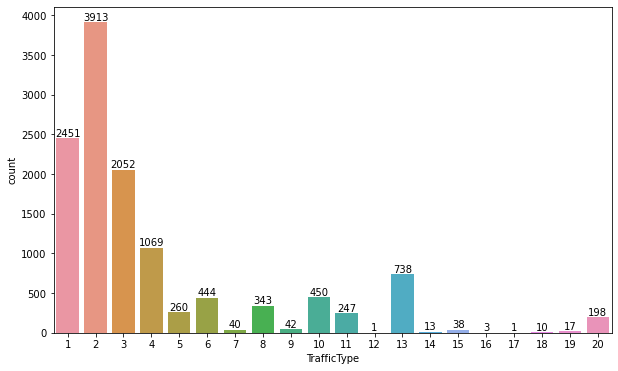

Percent Share of each Category is:
2     31.74
1     19.88
3     16.64
4      8.67
13     5.99
10     3.65
6      3.60
8      2.78
5      2.11
11     2.00
20     1.61
9      0.34
7      0.32
15     0.31
19     0.14
14     0.11
18     0.08
16     0.02
12     0.01
17     0.01
Name: TrafficType, dtype: float64


In [26]:
plot_count_plot(df,'TrafficType')
# Insights- mOst of the traffic comes from traffic type2 i.e approx 32%
# Almost 77% of the traffic comes from 4 traffic modes i.e 2,1,3,4
# Traffic type aids owners of website in knowing which traffic sources are generating revenue and which are the 
# sources where thye should invest more on advertising.
# We will drop traffic type as its not useful in determining if the user will make any purchase

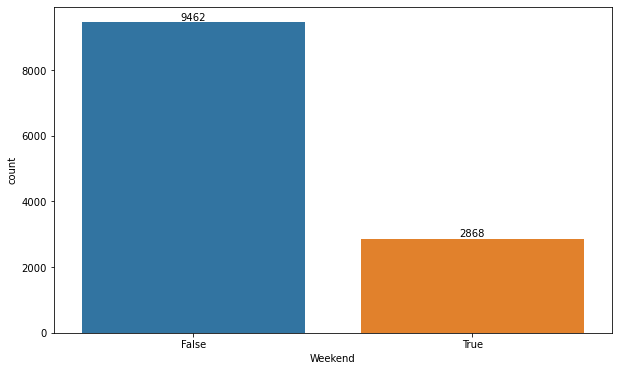

Percent Share of each Category is:
False    76.74
True     23.26
Name: Weekend, dtype: float64


In [27]:
plot_count_plot(df,'Weekend')
# Insights- most users visits the site on weekdays(Approx 77%) rather then weekends

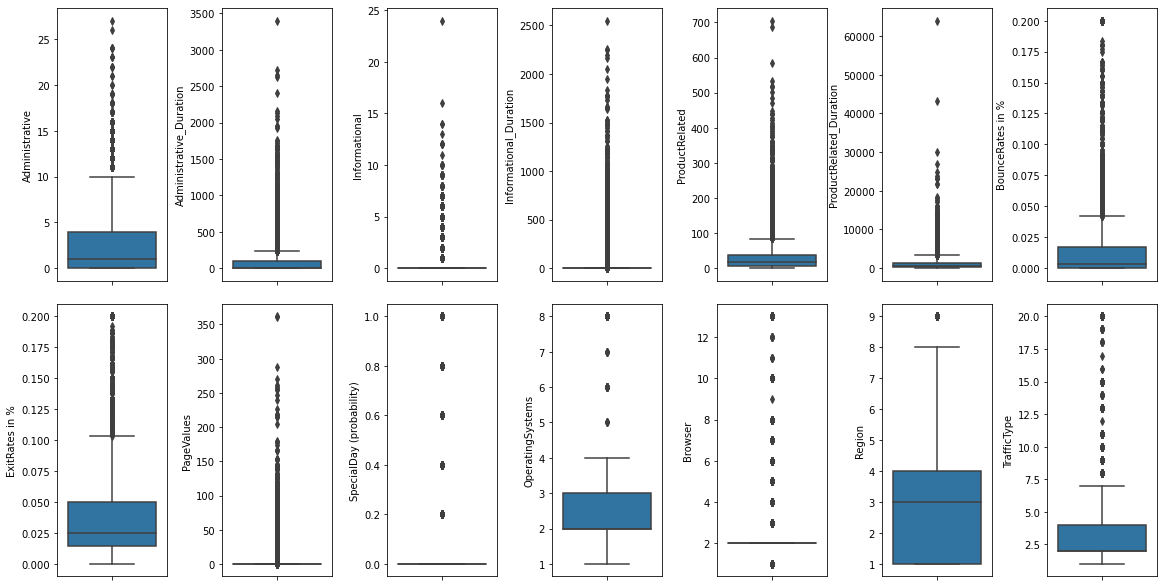

In [28]:
# Plot the box plots to see how the Data is distributed
fig,axs=plt.subplots(ncols=7,nrows=2,figsize=(16,8))
axs=axs.flatten()
sns.boxplot(y='Administrative',data=df,ax=axs[0])
sns.boxplot(y='Administrative_Duration',data=df,ax=axs[1])
sns.boxplot(y='Informational',data=df,ax=axs[2])
sns.boxplot(y='Informational_Duration',data=df,ax=axs[3])
sns.boxplot(y='ProductRelated',data=df,ax=axs[4])
sns.boxplot(y='ProductRelated_Duration',data=df,ax=axs[5])
sns.boxplot(y='BounceRates in %',data=df,ax=axs[6])
sns.boxplot(y='ExitRates in %',data=df,ax=axs[7])
sns.boxplot(y='PageValues',data=df,ax=axs[8])
sns.boxplot(y='SpecialDay (probability)',data=df,ax=axs[9])
sns.boxplot(y='OperatingSystems',data=df,ax=axs[10])
sns.boxplot(y='Browser',data=df,ax=axs[11])
sns.boxplot(y='Region',data=df,ax=axs[12])
sns.boxplot(y='TrafficType',data=df,ax=axs[13])


plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=2.0)

In [29]:
# We can see there are outliers. 
# We will use capping technique as we dont have much valuesin the duration columns most of them are already zero
Q1=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].quantile(0.25)
Q3=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print('Lower Limit is:',lower_limit)
print('Upper Limit is:',upper_limit)

Lower Limit is: Administrative_Duration    -139.884375
Informational_Duration        0.000000
ProductRelated_Duration   -1735.892070
dtype: float64
Upper Limit is: Administrative_Duration     233.140625
Informational_Duration        0.000000
ProductRelated_Duration    3384.186784
dtype: float64


In [30]:
# We can see that the upper limit and lower limit of the informatiion duration is coming as zero.
#also the Q1,Q2,Q33 values are zero. Out of 12330 values 9925 are zero so we will drop this column.

In [31]:
(df['Informational_Duration']==0).sum()

9925

In [32]:
df['Administrative_Duration']=np.where(df['Administrative_Duration']>upper_limit['Administrative_Duration'],
                                       upper_limit['Administrative_Duration'],np.where(df['Administrative_Duration']<0,0,
                                                                                       df['Administrative_Duration']))
df['ProductRelated_Duration']=np.where(df['ProductRelated_Duration']>upper_limit['ProductRelated_Duration'],
                                       upper_limit['ProductRelated_Duration'],np.where(df['ProductRelated_Duration']<0,0,
                                                                                       df['ProductRelated_Duration'])) #Wrong

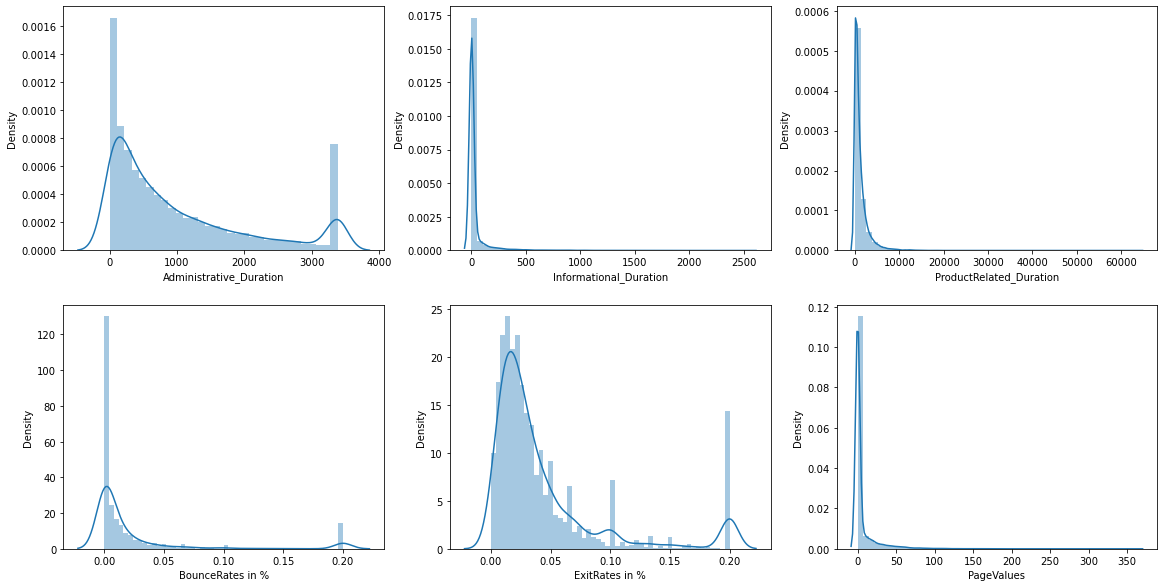

In [33]:
# Distribution Plot- for ll continous variables
# Continous variables: 'Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates in %',
#'ExitRates in %','PageValues'
fig,axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))
axs=axs.flatten()
sns.distplot(df['Administrative_Duration'],kde=True,ax=axs[0])
sns.distplot(df['Informational_Duration'],kde=True,ax=axs[1])
sns.distplot(df['ProductRelated_Duration'],kde=True,ax=axs[2])
sns.distplot(df['BounceRates in %'],kde=True,ax=axs[3])
sns.distplot(df['ExitRates in %'],kde=True,ax=axs[4])
sns.distplot(df['PageValues'],kde=True,ax=axs[5])
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=2.0)
# Insight- We can see that all the 6 continous columns are right skewed

In [34]:
# Bi-Variate Analysis:


<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

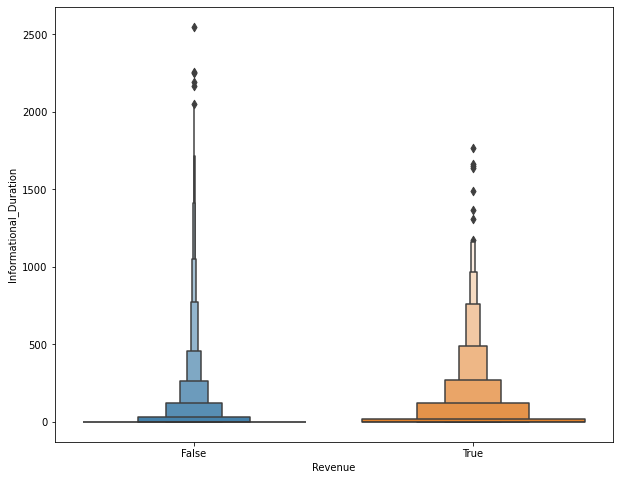

In [35]:
plt.figure(figsize=(10,8))
sns.boxenplot(df['Revenue'], df['Informational_Duration'])


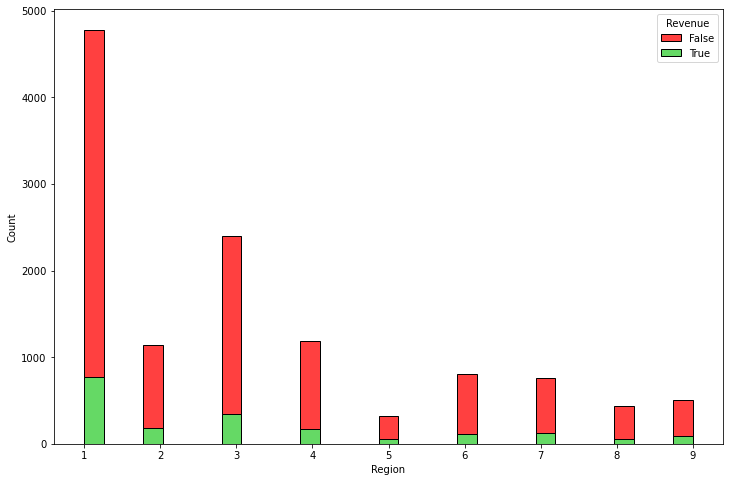

In [36]:
plt.figure(figsize=(12,8))
#sns.swarmplot(x = 'Revenue', y = 'PageValues', data = df,hue='Revenue')
sns.histplot(df,x='Region',hue='Revenue',multiple='stack',palette = ['red', 'limegreen'])
plt.show()

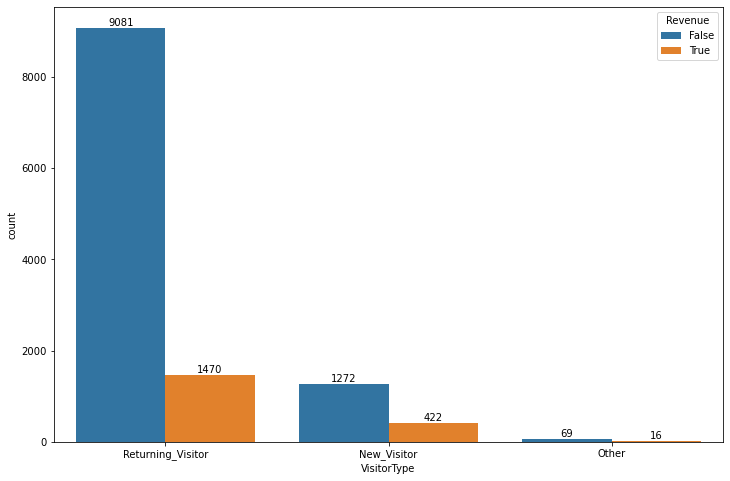

In [37]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='VisitorType',hue='Revenue')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
#  Appprox 1470 users out of the 10551 re generating revenue and 422 from 1272 new customers are generating revenue. 

<AxesSubplot:xlabel='BounceRates in %', ylabel='ExitRates in %'>

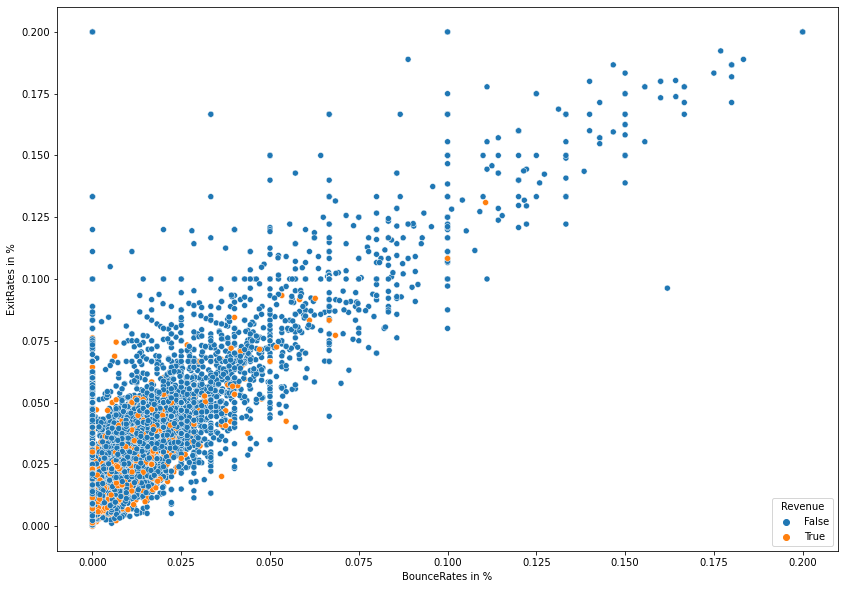

In [38]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x='BounceRates in %',y='ExitRates in %',hue='Revenue')
# Their is a linear relationship between exit rate and bounce rate and from the scatterplot it l;ooks like there
# is a positive coorelation between these two variables

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

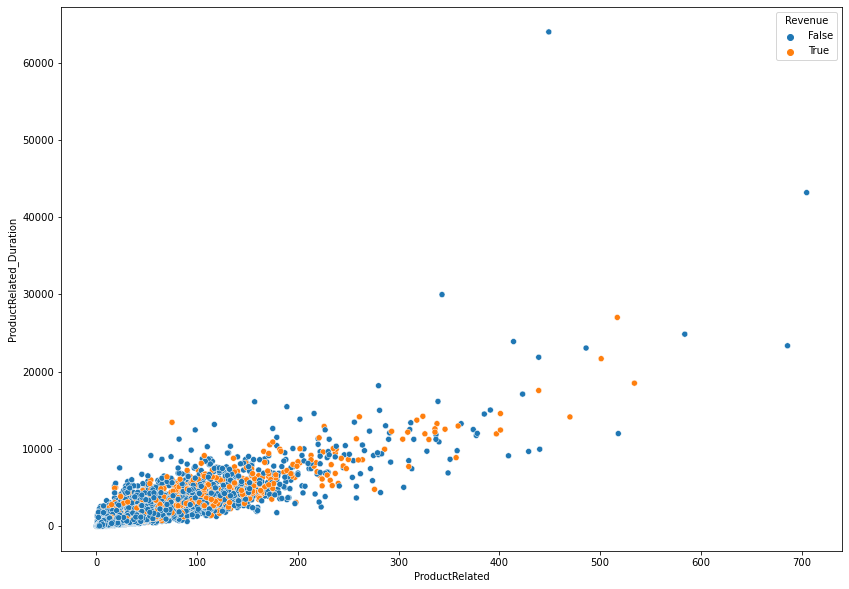

In [39]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x='ProductRelated',y='ProductRelated_Duration',hue='Revenue')
# Their is a linear relationship between ProductRelated and ProductRelated_Duration and from the scatterplot 
#looks like there is a positive linear coorelation between these two variables.

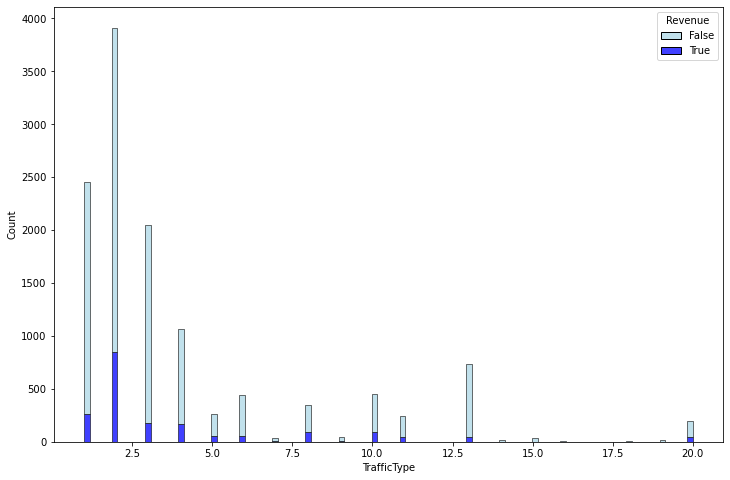

In [40]:
plt.figure(figsize=(12,8))
#sns.swarmplot(x = 'Revenue', y = 'PageValues', data = df,hue='Revenue')
sns.histplot(df,x='TrafficType',hue='Revenue',multiple='stack',palette = ['lightblue', 'blue'])
plt.show()
# Every traffic type is not contributing to the revenue. 
#Visitors from few of the traffic type are influenced to buy a product

In [41]:
# Columns to drop- OS,Browser- Reasoning along with graphs as they will not influencce in revenue generation
df.drop(columns=['OperatingSystems','Browser'],inplace=True)
df.shape

(12330, 16)

In [42]:
# Changing the Weekend column to numerical form
df['Weekend']=df['Weekend'].map({False:0,True:1})

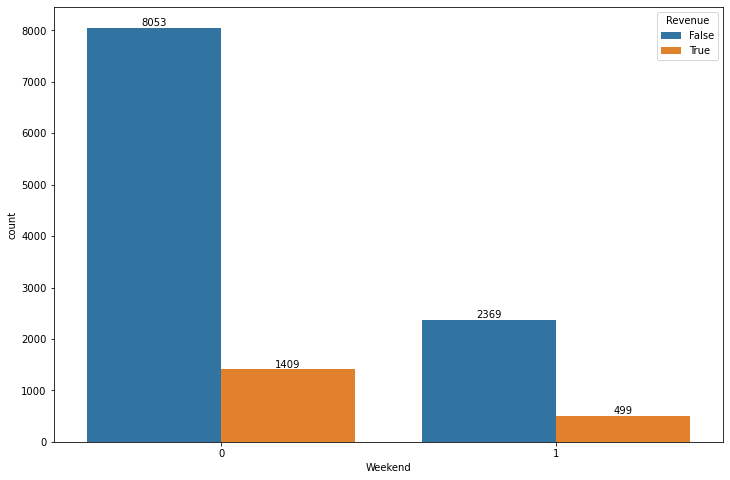

In [43]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='Weekend',hue='Revenue')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [44]:
# WE can drop weekend column as well because most of the visitors are on weekdays 
#but the proportion of the revenue generated are almost same
df=df.drop('Weekend',axis=1)
df.shape

(12330, 15)

In [45]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,Region,TrafficType,VisitorType,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,Returning_Visitor,False
1,0,64.000000,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,1,2,Returning_Visitor,False
2,0,0.000000,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,9,3,Returning_Visitor,False
3,0,2.666667,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,4,Returning_Visitor,False
4,0,627.500000,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,1,4,Returning_Visitor,False


In [46]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Region,TrafficType,Revenue
Administrative,1.000000,0.403521,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.005487,-0.033561,0.138917
Administrative_Duration,0.403521,1.000000,0.351148,0.258090,0.736299,0.788235,-0.275723,-0.373323,0.104488,-0.038450,-0.017820,-0.053805,0.191169
Informational,0.376850,0.351148,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.029169,-0.034491,0.095200
Informational_Duration,0.255848,0.258090,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.027144,-0.024675,0.070345
ProductRelated,0.431119,0.736299,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,-0.038122,-0.043064,0.158538
ProductRelated_Duration,0.373939,0.788235,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,-0.033091,-0.036377,0.152373
BounceRates in %,-0.223563,-0.275723,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.006485,0.078286,-0.150673
ExitRates in %,-0.316483,-0.373323,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.008907,0.078616,-0.207071
PageValues,0.098990,0.104488,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.011315,0.012532,0.492569
SpecialDay (probability),-0.094778,-0.038450,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.016098,0.052301,-0.082305


<AxesSubplot:>

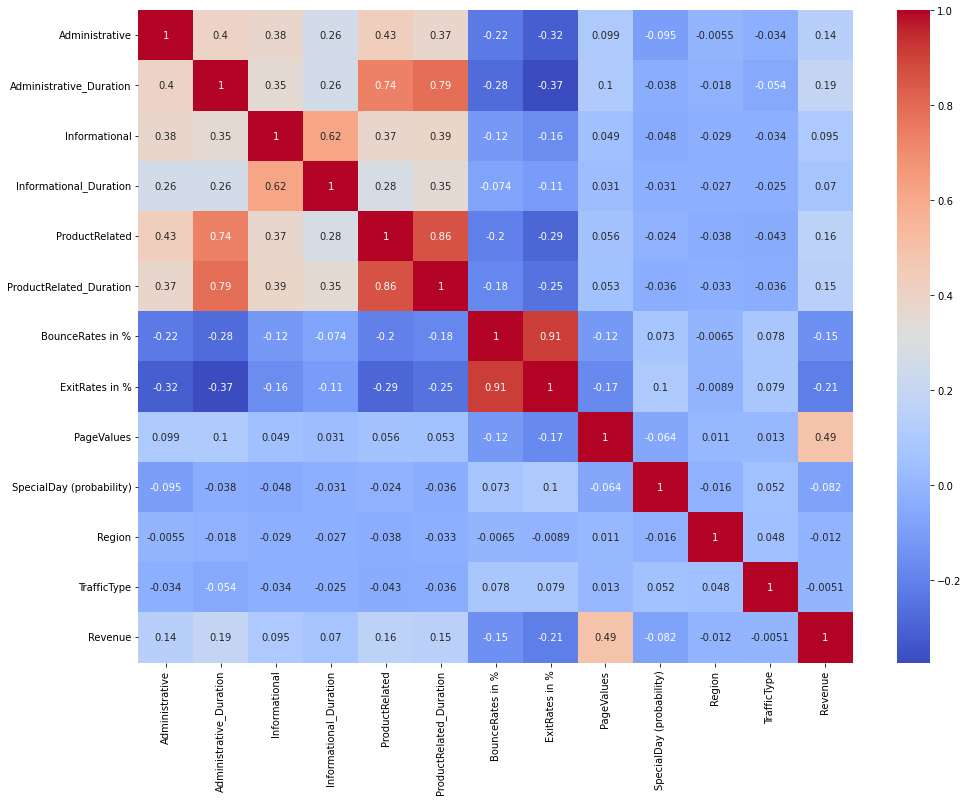

In [48]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(), annot=True,cmap='coolwarm')

In [47]:
#Bounce rate and exit rate are highly corelated so we can drop one variable. 
# We will drop bounce rate
df=df.drop('BounceRates in %',axis=1)
df.shape

(12330, 14)

In [48]:
# Changing the Revenue column to numerical form
df['Revenue']=df['Revenue'].map({False:0,True:1})

In [49]:
df=pd.get_dummies(df,columns=['VisitorType','Month','TrafficType'])

In [50]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates in %,PageValues,SpecialDay (probability),Region,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,0,0.000000,0,0.0,1,0.000000,0.20,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,64.000000,0,0.0,2,64.000000,0.10,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,0.0,1,0.000000,0.20,0.0,0.0,9,...,0,0,0,0,0,0,0,0,0,0
3,0,2.666667,0,0.0,2,2.666667,0.14,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,627.500000,0,0.0,10,627.500000,0.05,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Dropping 1 coln from each dummy to avoid Multicolinearity
df.drop(columns=['VisitorType_Other','Month_Feb','TrafficType_17'],inplace=True)

In [52]:
pd.set_option('display.max_columns', None)  # Display Max columns

In [53]:
# Moving the revenue coln t the last
import movecolumn as mc
mc.MoveToLast(df,'Revenue')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates in %,PageValues,SpecialDay (probability),Region,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.20,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,64.000000,0,0.0,2,64.000000,0.10,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,0.0,1,0.000000,0.20,0.0,0.0,9,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.666667,0,0.0,2,2.666667,0.14,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,627.500000,0,0.0,10,627.500000,0.05,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   ExitRates in %                 12330 non-null  float64
 7   PageValues                     12330 non-null  float64
 8   SpecialDay (probability)       12330 non-null  float64
 9   Region                         12330 non-null  int64  
 10  VisitorType_New_Visitor        12330 non-null  uint8  
 11  VisitorType_Returning_Visitor  12330 non-null  uint8  
 12  Month_Aug                      12330 non-null 

In [55]:
df1=df.copy() # backup

In [57]:
#Separating Dependent and independent Var
X=df.drop('Revenue',axis=1)
Y=df['Revenue']

In [58]:
# As we are using a logistic regression model we need to standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [59]:
X=sc.fit_transform(X)
X

array([[-0.69699296, -0.95800238, -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [-0.69699296, -0.8960516 , -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [-0.69699296, -0.95800238, -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       ...,
       [-0.69699296, -0.77965191, -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [ 0.50722805, -0.623081  , -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [-0.69699296, -0.93743279, -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161]])

In [60]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)


### Model-1- Logistic Regression

In [61]:
# Logistic regression 
from sklearn.linear_model import LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression
model_logi=LogisticRegression()
model_logi.fit(X_train,Y_train)

LogisticRegression()

In [63]:
y_pred=model_logi.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
# Performance and accuracy
from sklearn import metrics
cnf_matrix_logi=metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix_logi

array([[2566,   70],
       [ 275,  172]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

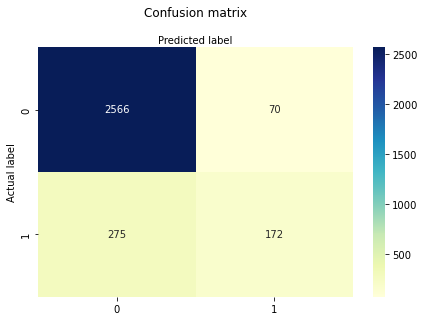

In [65]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logi), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Our model accuracy is almost 89% which is very good but as the data is imbalancce then we may get issues there.

Accuracy: 0.8880960103795005


In [67]:
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
# Recall- True positive rate TP/TP+FN i.e 1 predicted as 1: 172 times out of (172+275). Very Low
# precision: : False Positivity rate:TP/TP+FP      172 172+70

Precision: 0.7107438016528925
Recall: 0.38478747203579416


In [69]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
print(classification_report(Y_test,y_pred))
# F-score is very Less i.e 0.5 which is not aceptable

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2636
           1       0.71      0.38      0.50       447

    accuracy                           0.89      3083
   macro avg       0.81      0.68      0.72      3083
weighted avg       0.88      0.89      0.87      3083



In [70]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

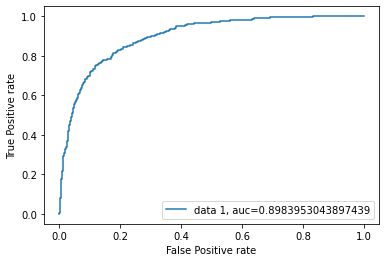

In [71]:
y_pred_proba = model_logi.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()
# Area under the ROC plot is ~ 90% 

In [72]:
# the above model accuracy is high but the as there is data imbalnce the precision and recall are low.
#SO we can't accept this model

In [73]:
# If we have data imbalance model like RF may work. 

### Model-2- Random forest

In [74]:
#Import the libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import time

In [75]:
# Hyper parameter Optimization using gridsearchcv
fit_rf = RandomForestClassifier(random_state=101)
np.random.seed(101)
start = time.time()

param_dist = {'max_depth': [3,4,5,6,7],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None}
Time taken in grid search:  2371.89


In [76]:
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 5,
                 bootstrap=True)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       random_state=101)

In [77]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators1 = 15
max_estimators1 = 500

error_rate = {}

for i in range(min_estimators1, max_estimators1 + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, Y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [78]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

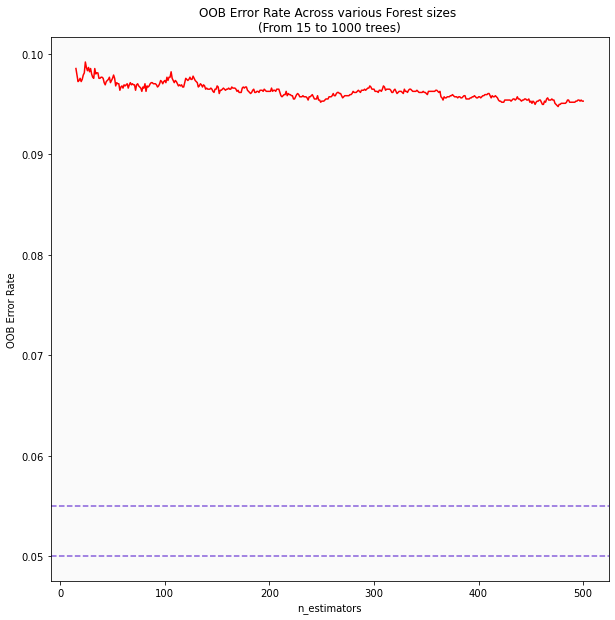

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [80]:
# we will take 250 as n estimator as the error rate is almost same

In [81]:
print('OOB Error rate for 250 trees is: {0:.5f}'.format(oob_series[250]))

OOB Error rate for 250 trees is: 0.09527


In [82]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=250,
                  bootstrap = True,
                  max_depth = 5,
                  criterion = 'entropy',
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       n_estimators=250, random_state=101)

In [83]:
#train the RF model
fit_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       n_estimators=250, random_state=101)

In [84]:
predictions_rf = fit_rf.predict(X_test)

In [85]:
predictions_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
# Performance and accuracy
from sklearn import metrics
cnf_matrix_RF=metrics.confusion_matrix(Y_test,predictions_rf)
cnf_matrix_RF

array([[2509,  127],
       [ 160,  287]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

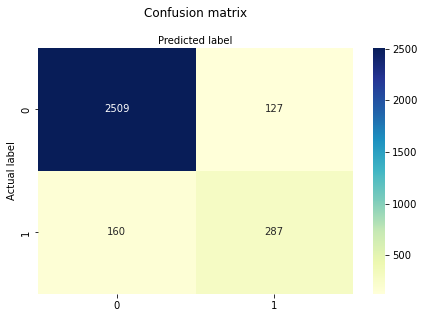

In [87]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
print("Accuracy:",metrics.accuracy_score(Y_test, predictions_rf))

Accuracy: 0.9069088550113525


In [89]:
print(classification_report(Y_test,predictions_rf))
# Precidion score is 0.69 and Recall is 0.64. F-score is 0.67 but the accuracy is coming to be 90% due to imbalance.
# this model is not acceeptable. 
# we need to balance the data

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2636
           1       0.69      0.64      0.67       447

    accuracy                           0.91      3083
   macro avg       0.82      0.80      0.81      3083
weighted avg       0.90      0.91      0.91      3083



### Balance The data

In [90]:
# We will balance the data: We will use upsampling method i.e upsample the minority class
# SMOTE-(Synthetic minoroty oversampling technique)

from sklearn.utils import resample

In [93]:
df['Revenue'].value_counts()
# As we can see there are 10422 records for 0 and 1908 for 1. SO there is huge imbalance in the data

0    10422
1     1908
Name: Revenue, dtype: int64

In [94]:
# Solitting the df on the basis of  majority and minority class
df_majority=df[df.Revenue==0]   ##10422 Record
df_minority=df[df.Revenue==1]   ##1908
df_minority.head()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates in %,PageValues,SpecialDay (probability),Region,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,Revenue
65,3,798.333333,0,0.0,27,798.333333,0.012644,22.916036,0.8,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
76,10,2111.341667,0,0.0,36,2111.341667,0.014493,11.439412,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
101,4,607.000000,0,0.0,19,607.000000,0.026984,17.535959,1.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
188,9,1868.819697,1,48.5,49,1868.819697,0.020709,1.706015,0.0,7,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
196,2,2563.783333,1,144.0,67,2563.783333,0.005797,19.342650,0.0,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [95]:
df_minority_unsampled=resample(df_minority,replace=True,n_samples=10422,random_state=123)

In [96]:
#concatenate both
df_new_balan=pd.concat([df_majority,df_minority_unsampled])

In [97]:
df_new_balan.Revenue.value_counts()
# Now the dataset is balanced

0    10422
1    10422
Name: Revenue, dtype: int64

In [98]:
df_new_balan.shape

(20844, 41)

In [99]:
#Separating Dependent and independent Var
X_bal=df_new_balan.drop('Revenue',axis=1)
Y_bal=df_new_balan['Revenue']

In [100]:
X_bal.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates in %,PageValues,SpecialDay (probability),Region,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20
0,0,0.000000,0,0.0,1,0.000000,0.20,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,64.000000,0,0.0,2,64.000000,0.10,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,0.0,1,0.000000,0.20,0.0,0.0,9,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.666667,0,0.0,2,2.666667,0.14,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,627.500000,0,0.0,10,627.500000,0.05,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
### Model-1 after rebalncing the data- Logistic Regression

In [102]:
# As we are using a logistic regression model we need to standardize the data
from sklearn.preprocessing import StandardScaler
sc_bal=StandardScaler()

In [103]:
X_bal=sc_bal.fit_transform(X_bal)
X_bal

array([[-0.7808638 , -1.08728068, -0.44458941, ..., -0.02190855,
        -0.03323633, -0.14147325],
       [-0.7808638 , -1.02844304, -0.44458941, ..., -0.02190855,
        -0.03323633, -0.14147325],
       [-0.7808638 , -1.08728068, -0.44458941, ..., -0.02190855,
        -0.03323633, -0.14147325],
       ...,
       [ 0.07984684,  0.22222468,  1.01123051, ..., -0.02190855,
        -0.03323633, -0.14147325],
       [-0.49396025,  0.97694007,  1.73914046, ..., -0.02190855,
        -0.03323633, -0.14147325],
       [ 0.07984684,  0.85956028, -0.44458941, ..., -0.02190855,
        -0.03323633, -0.14147325]])

In [104]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train_bal,X_test_bal,Y_train_bal,Y_test_bal=train_test_split(X_bal,Y_bal,test_size=0.25,random_state=101)


In [105]:
# Logistic regression 
from sklearn.linear_model import LogisticRegression

In [106]:
model_bal_logi=LogisticRegression()
model_bal_logi.fit(X_train_bal,Y_train_bal)

LogisticRegression()

In [107]:
y_pred_log_bal=model_bal_logi.predict(X_test_bal)
y_pred_log_bal

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [108]:
# Performance and accuracy
from sklearn import metrics
cnf_matrix_bal_logi=metrics.confusion_matrix(Y_test_bal,y_pred_log_bal)
cnf_matrix_bal_logi

array([[2279,  368],
       [ 549, 2015]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

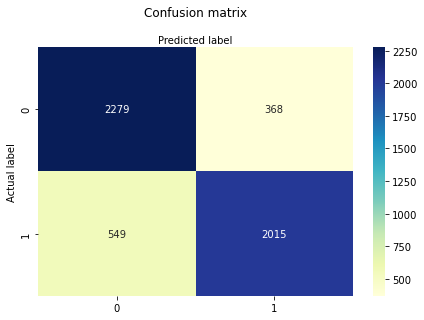

In [109]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_bal_logi), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [110]:
print("Accuracy:",metrics.accuracy_score(Y_test_bal, y_pred_log_bal))

Accuracy: 0.8240260986374977


In [111]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
print(classification_report(Y_test_bal,y_pred_log_bal))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2647
           1       0.85      0.79      0.81      2564

    accuracy                           0.82      5211
   macro avg       0.83      0.82      0.82      5211
weighted avg       0.83      0.82      0.82      5211



In [112]:
### Model Accuracy decreased, but recall and precision scored increased significantly after balancing the data

### Model-2-Decision tree( Balancing again as no need for standardization)

In [113]:
df2=pd.read_csv('online_shoppers_intention (1).csv')
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [114]:
Q1=df2[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].quantile(0.25)
Q3=df2[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print('Lower Limit is:',lower_limit)
print('Upper Limit is:',upper_limit)

Lower Limit is: Administrative_Duration    -139.884375
Informational_Duration        0.000000
ProductRelated_Duration   -1735.892070
dtype: float64
Upper Limit is: Administrative_Duration     233.140625
Informational_Duration        0.000000
ProductRelated_Duration    3384.186784
dtype: float64


In [115]:
#capping the outliers
df2['Administrative_Duration']=np.where(df2['Administrative_Duration']>upper_limit['Administrative_Duration'],upper_limit['Administrative_Duration'],
                                       np.where(df2['Administrative_Duration']<0,0,df2['Administrative_Duration']))
# no rows are deleted
df2['Administrative_Duration']=np.where(df2['ProductRelated_Duration']>upper_limit['ProductRelated_Duration'],upper_limit['ProductRelated_Duration'],
                                       np.where(df2['ProductRelated_Duration']<0,0,df2['ProductRelated_Duration']))
# no rows are deleted

In [116]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,64.000000,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,2.666667,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,627.500000,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [117]:
df2.drop(columns=['OperatingSystems','Browser','Weekend','Informational_Duration'],inplace=True)
df2.shape

(12330, 14)

In [118]:
# Changing the Revenue column to numerical form
df2['Revenue']=df2['Revenue'].map({False:0,True:1})
df2['VisitorType']=df2['VisitorType'].map({'Returning_Visitor':1,'New_Visitor':2,'Other':0})


In [119]:
df2['Month']=df2['Month'].astype('category')
df2['Month']=df2['Month'].cat.codes

In [120]:
df2.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,Region,TrafficType,VisitorType,Revenue
0,0,0.000000,0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,0
1,0,64.000000,0,2,64.000000,0.00,0.10,0.0,0.0,2,1,2,1,0
2,0,0.000000,0,1,0.000000,0.20,0.20,0.0,0.0,2,9,3,1,0
3,0,2.666667,0,2,2.666667,0.05,0.14,0.0,0.0,2,2,4,1,0
4,0,627.500000,0,10,627.500000,0.02,0.05,0.0,0.0,2,1,4,1,0


In [121]:
# Balance the Data

In [122]:
# Solitting the df on the basis of  majority and minority class
df2_majority=df2[df2.Revenue==0]   ##10422 Record
df2_minority=df2[df2.Revenue==1]   ##1908
df2_minority.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,Region,TrafficType,VisitorType,Revenue
65,3,798.333333,0,27,798.333333,0.000000,0.012644,22.916036,0.8,2,3,1,1,1
76,10,2111.341667,0,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,1,2,1,1
101,4,607.000000,0,19,607.000000,0.000000,0.026984,17.535959,1.0,2,7,4,1,1
188,9,1868.819697,1,49,1868.819697,0.000000,0.020709,1.706015,0.0,5,7,2,1,1
196,2,2563.783333,1,67,2563.783333,0.000000,0.005797,19.342650,0.0,5,4,2,2,1


In [123]:
df2_minority_unsampled=resample(df2_minority,replace=True,n_samples=10422,random_state=123)

In [124]:
#concatenate both
df2_new_balan=pd.concat([df2_majority,df2_minority_unsampled])

In [125]:
df2_new_balan.Revenue.value_counts()
# Now the dataset is balanced

0    10422
1    10422
Name: Revenue, dtype: int64

In [126]:
df2_new_balan.shape

(20844, 14)

In [127]:
#Separating Dependent and independent Var
X_bal2=df2_new_balan.drop('Revenue',axis=1)
Y_bal2=df2_new_balan['Revenue']

In [128]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train_bal2,X_test_bal2,Y_train_bal2,Y_test_bal2=train_test_split(X_bal2,Y_bal2,test_size=0.20,random_state=101)


In [129]:
# Import the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

fit_dec_bal2=DecisionTreeClassifier()

In [130]:
import time
np.random.seed(101)
start=time.time()
param_dist_bal={'max_depth':[11,12,13,14],
            'min_samples_split':[5,10,20],
            'min_samples_leaf':[1,2,3,4,5]}
cv_rf_bal=GridSearchCV(fit_dec_bal2,cv=10,param_grid=param_dist_bal,n_jobs=2)
cv_rf_bal.fit(X_train_bal2,Y_train_bal2)
print('Best parameters using gridsearch: \n',cv_rf_bal.best_params_)
end=time.time()
print('Time taken in grid search:{0: .2f}'.format(end-start))

Best parameters using gridsearch: 
 {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 5}
Time taken in grid search: 53.35


In [131]:
model_dt_bal=DecisionTreeClassifier(max_depth= 14, min_samples_leaf=1, min_samples_split=5,random_state=101)
model_dt_bal.fit(X_train_bal2,Y_train_bal2)
model_dt_bal_score_train=model_dt_bal.score(X_train_bal2,Y_train_bal2)
model_dt_bal_score_test=model_dt_bal.score(X_test_bal2,Y_test_bal2)
print('Test Score is:',model_dt_bal_score_test*100,}"?%')ll

Training Score is: 95.880059970015 %
Test Score is: 91.9165267450228 %


In [132]:
predictions_bal=model_dt_bal.predict(X_test_bal2)
predictions_bal

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [133]:
print("Accuracy:",metrics.accuracy_score(Y_test_bal2, predictions_bal))

Accuracy: 0.9191652674502279


In [134]:
cnf_matrix_DT_bal=metrics.confusion_matrix(Y_test_bal2,predictions_bal)
cnf_matrix_DT_bal

array([[1872,  234],
       [ 103, 1960]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

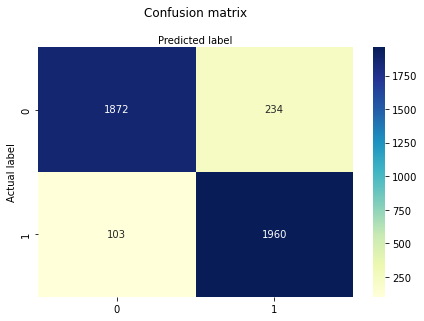

In [153]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT_bal), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [135]:
print(classification_report(Y_test_bal2,predictions_bal))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2106
           1       0.89      0.95      0.92      2063

    accuracy                           0.92      4169
   macro avg       0.92      0.92      0.92      4169
weighted avg       0.92      0.92      0.92      4169



In [136]:
# We are getting precision score as 0.89 and recall score as 0.95. F-1 score is .92. Which is goood
# This model is accceptable

In [137]:
########################RF 

In [138]:
#Algo-3- Random forest after rebalncing
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [139]:
# Hyper parameter Optimization using gridsearchcv
fit_rf_bal = RandomForestClassifier(random_state=101)
np.random.seed(101)
start = time.time()

param_dist_bal = {'max_depth': [11,12,13,14],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
cv_rf_bal = GridSearchCV(fit_rf_bal, cv = 10,param_grid=param_dist_bal, n_jobs = 2)  
cv_rf_bal.fit(X_train_bal2, Y_train_bal2)
print('Best Parameters using grid search: \n', cv_rf_bal.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto'}
Time taken in grid search:  2858.90


In [140]:
fit_rf_bal.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 14,
                 bootstrap=False)

RandomForestClassifier(bootstrap=False, max_depth=14, random_state=101)

In [141]:
fit_rf_bal.set_params(warm_start=True, 
                  oob_score=True)

min_estimators1 = 100
max_estimators1 = 500

error_rate = {}

for i in range(min_estimators1, max_estimators1 + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train_bal2, Y_train_bal2)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [142]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

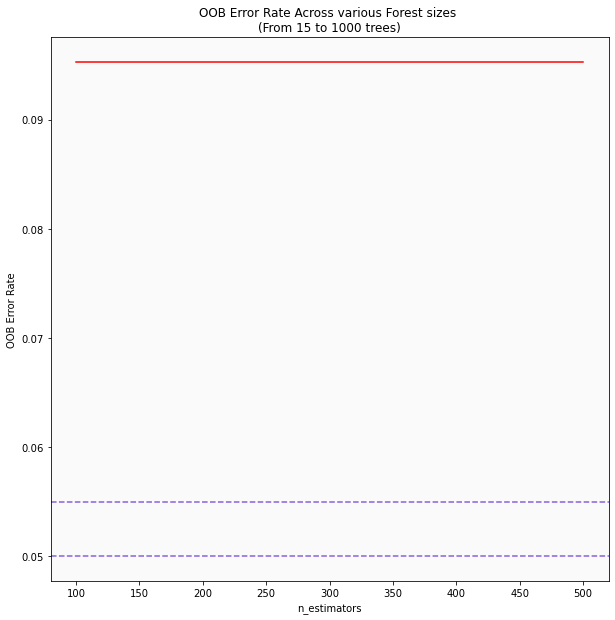

In [143]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [144]:
print('OOB Error rate for 100 trees is: {0:.5f}'.format(oob_series[100]))

OOB Error rate for 100 trees is: 0.09527


In [157]:
# Refine the tree via OOB Output
fit_rf_bal.set_params(n_estimators=100,bootstrap = True,max_depth = 14,criterion = 'gini',max_features = 'auto')
                 # warm_start=False, 
                  #oob_score=False)

RandomForestClassifier(max_depth=14, oob_score=True, random_state=101,
                       warm_start=True)

In [158]:
#train the RF model
fit_rf_bal.fit(X_train_bal2, Y_train_bal2)

RandomForestClassifier(max_depth=14, oob_score=True, random_state=101,
                       warm_start=True)

In [159]:
predictions_rf_bal = fit_rf_bal.predict(X_test_bal2)
predictions_rf_bal

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [160]:
# Performance and accuracy
from sklearn import metrics
cnf_matrix_RF_bal=metrics.confusion_matrix(Y_test_bal2,predictions_rf_bal)
cnf_matrix_RF_bal

array([[1894,  212],
       [   7, 2056]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

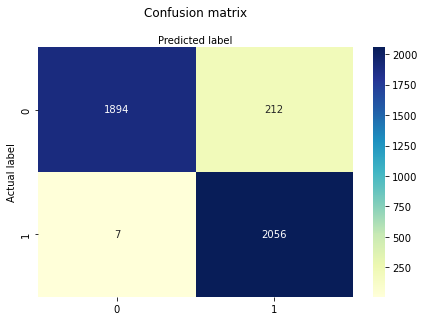

In [154]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF_bal), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [151]:
print("Accuracy:",metrics.accuracy_score(Y_test_bal2, predictions_rf_bal))

Accuracy: 0.9474694171264092


In [152]:
print(classification_report(Y_test_bal2,predictions_rf_bal))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2106
           1       0.91      1.00      0.95      2063

    accuracy                           0.95      4169
   macro avg       0.95      0.95      0.95      4169
weighted avg       0.95      0.95      0.95      4169



### Model-6 SVm(Support Vector MAchine)

In [161]:
from sklearn.svm import SVC
svm_model=SVC()

In [167]:
tuned_parameters = {'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear','rbf','poly'],
                    'gamma': [0.01,0.02,0.03,0.04,0.05],'degree': [2] }

In [191]:
tuned_parameters = {'C': [10,20,30] , 'kernel': ['rbf'],
                    'gamma': [0.03,0.05,0.08],'degree': [2]}  #90%

In [196]:
tuned_parameters = {'C': [30,50,70] , 'kernel': ['rbf'],
                    'gamma': [0.08,0.1,0.5],'degree': [2]}  ##95%

In [201]:
tuned_parameters = {'C': [70,90,110] , 'kernel': ['rbf'],
                    'gamma': [0.1,0.5,0.8],'degree': [2]}  ##95.5

In [211]:
tuned_parameters = {'C': [90] , 'kernel': ['rbf'],
                    'gamma': [0.8,1,2],'degree': [2]}  ##97%

In [216]:
tuned_parameters = {'C': [90] , 'kernel': ['rbf'],
                    'gamma': [2,8,16],'degree': [2]}  ## 98.4

In [222]:
tuned_parameters = {'C': [90] , 'kernel': ['rbf'],
                    'gamma': [16,32,64],'degree': [2]}  ## 98.59

In [245]:
tuned_parameters = {'C': [90] , 'kernel': ['rbf'],
                    'gamma': [256,512,1024],'degree': [2]}  #98.66

In [255]:
tuned_parameters = {'C': [90] , 'kernel': ['rbf'],
                    'gamma': [64,128,256],'degree': [2]}  ## 99.52  

In [256]:
tuned_parameters

{'C': [90], 'kernel': ['rbf'], 'gamma': [64, 128, 256], 'degree': [2]}

In [257]:
from sklearn.model_selection import GridSearchCV
model_svm=GridSearchCV(svm_model,tuned_parameters,cv=10,scoring='accuracy')
model_svm

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [90], 'degree': [2], 'gamma': [64, 128, 256],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
from sklearn.model_selection import GridSearchCV
model_svm=GridSearchCV(svm_model,tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(X_train_bal,Y_train_bal)

In [258]:
model_svm.fit(X_train_bal,Y_train_bal)
print(model_svm.best_score_)

0.9865026107246704


In [259]:
print(model_svm.best_params_)

{'C': 90, 'degree': 2, 'gamma': 256, 'kernel': 'rbf'}


In [260]:
predictions_svm = model_svm.predict(X_test_bal)
predictions_svm

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [261]:
from sklearn import metrics
cnf_matrix_svm=metrics.confusion_matrix(Y_test_bal,predictions_svm)
cnf_matrix_svm

array([[2647,    0],
       [  25, 2539]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

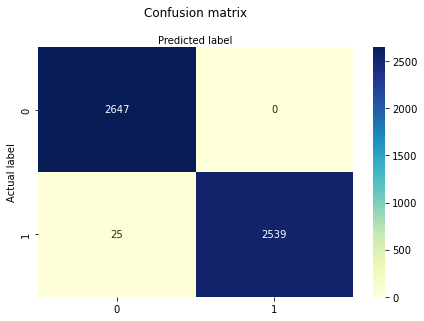

In [262]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [263]:
print("Accuracy:",metrics.accuracy_score(Y_test_bal, predictions_svm))

Accuracy: 0.9952024563423527


In [264]:
print(classification_report(Y_test_bal,predictions_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2647
           1       1.00      0.99      1.00      2564

    accuracy                           1.00      5211
   macro avg       1.00      1.00      1.00      5211
weighted avg       1.00      1.00      1.00      5211



### Feature Importance : Random forest Classifier

In [270]:
feature_scores = pd.Series(fit_rf_bal.feature_importances_, index=X_train_bal2.columns).sort_values(ascending=False)

feature_scores
# We can see that page value is the most important feature

PageValues                  0.441109
ExitRates in %              0.104419
Administrative_Duration     0.078630
ProductRelated_Duration     0.071912
Month                       0.069556
ProductRelated              0.055689
BounceRates in %            0.055603
Administrative              0.042580
TrafficType                 0.026711
Region                      0.022692
Informational               0.015455
VisitorType                 0.010602
SpecialDay (probability)    0.005042
dtype: float64

In [279]:
from sklearn import tree

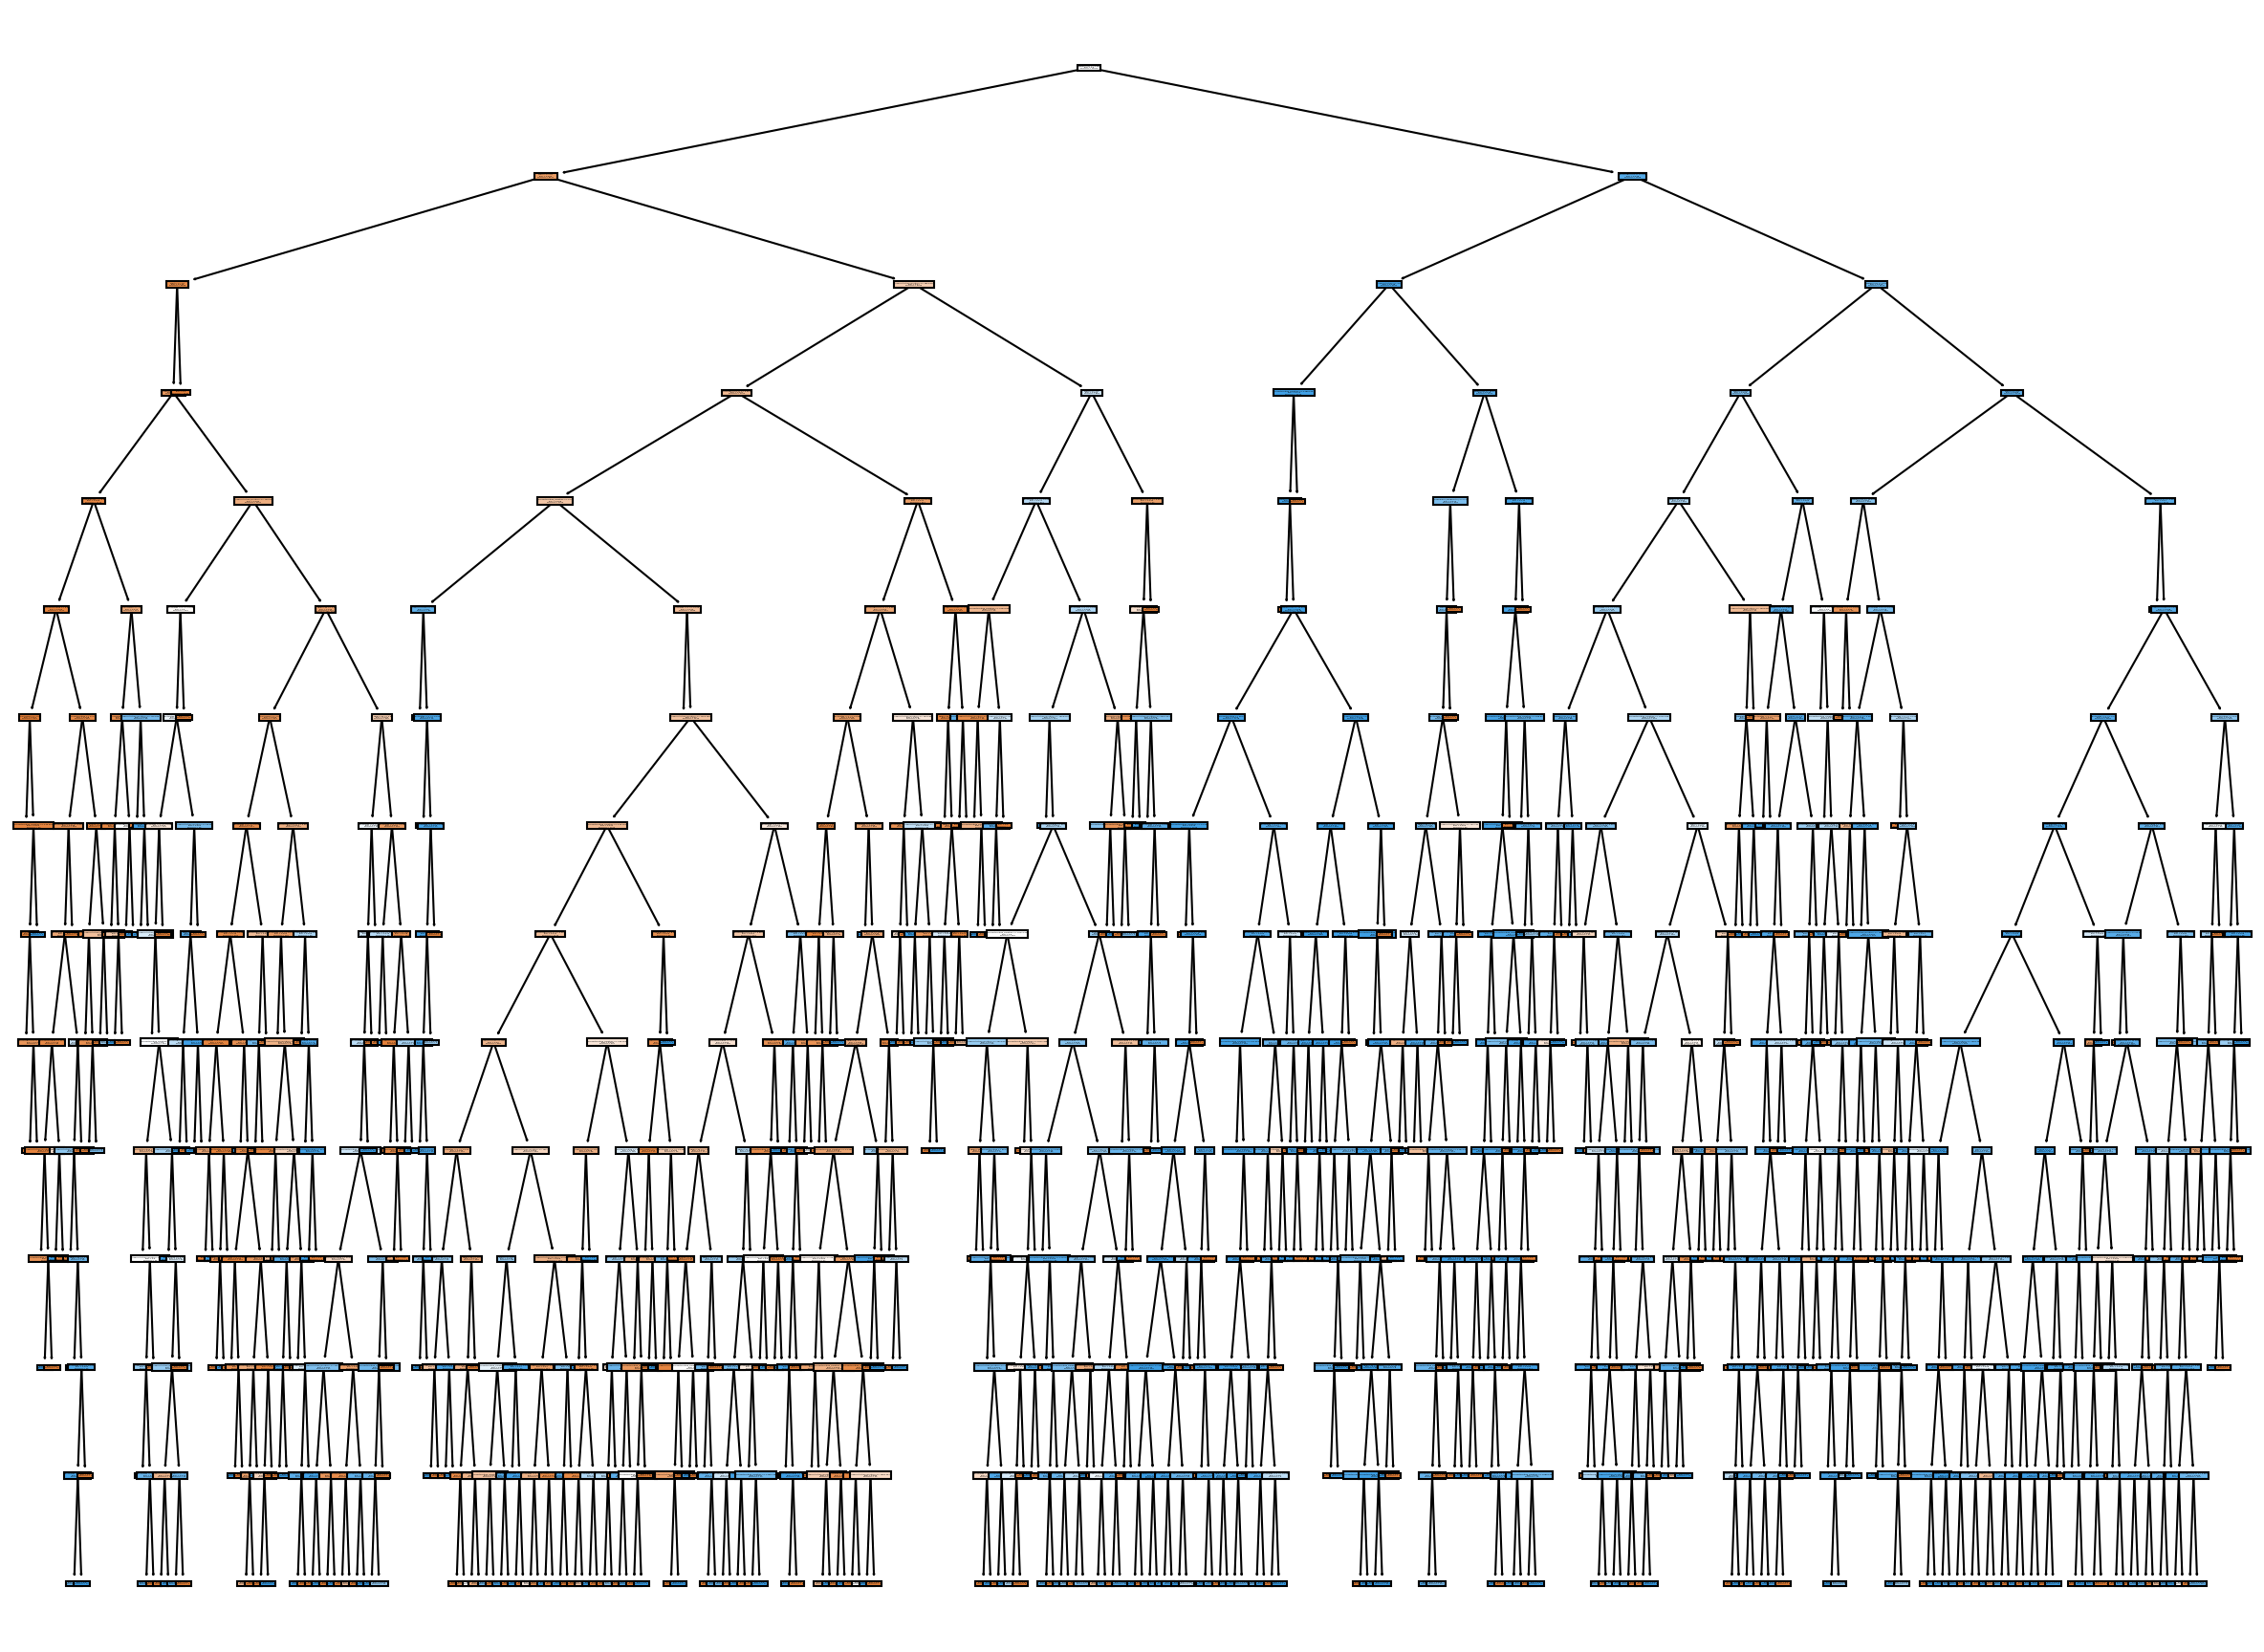

In [281]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi=150)
plot_tree(model_dt_bal,filled=True,feature_names=X_train_bal2.columns)
plt.show()

In [282]:
pruned_tree=DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train_bal2,Y_train_bal2)

DecisionTreeClassifier(max_depth=3)

In [287]:
def report_model(model):
    model_preds=model.predict(X_test_bal2)
    print(classification_report(Y_test_bal2,model_preds))
    print("\n")
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X_train_bal2.columns)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2106
           1       0.84      0.86      0.85      2063

    accuracy                           0.85      4169
   macro avg       0.85      0.85      0.85      4169
weighted avg       0.85      0.85      0.85      4169





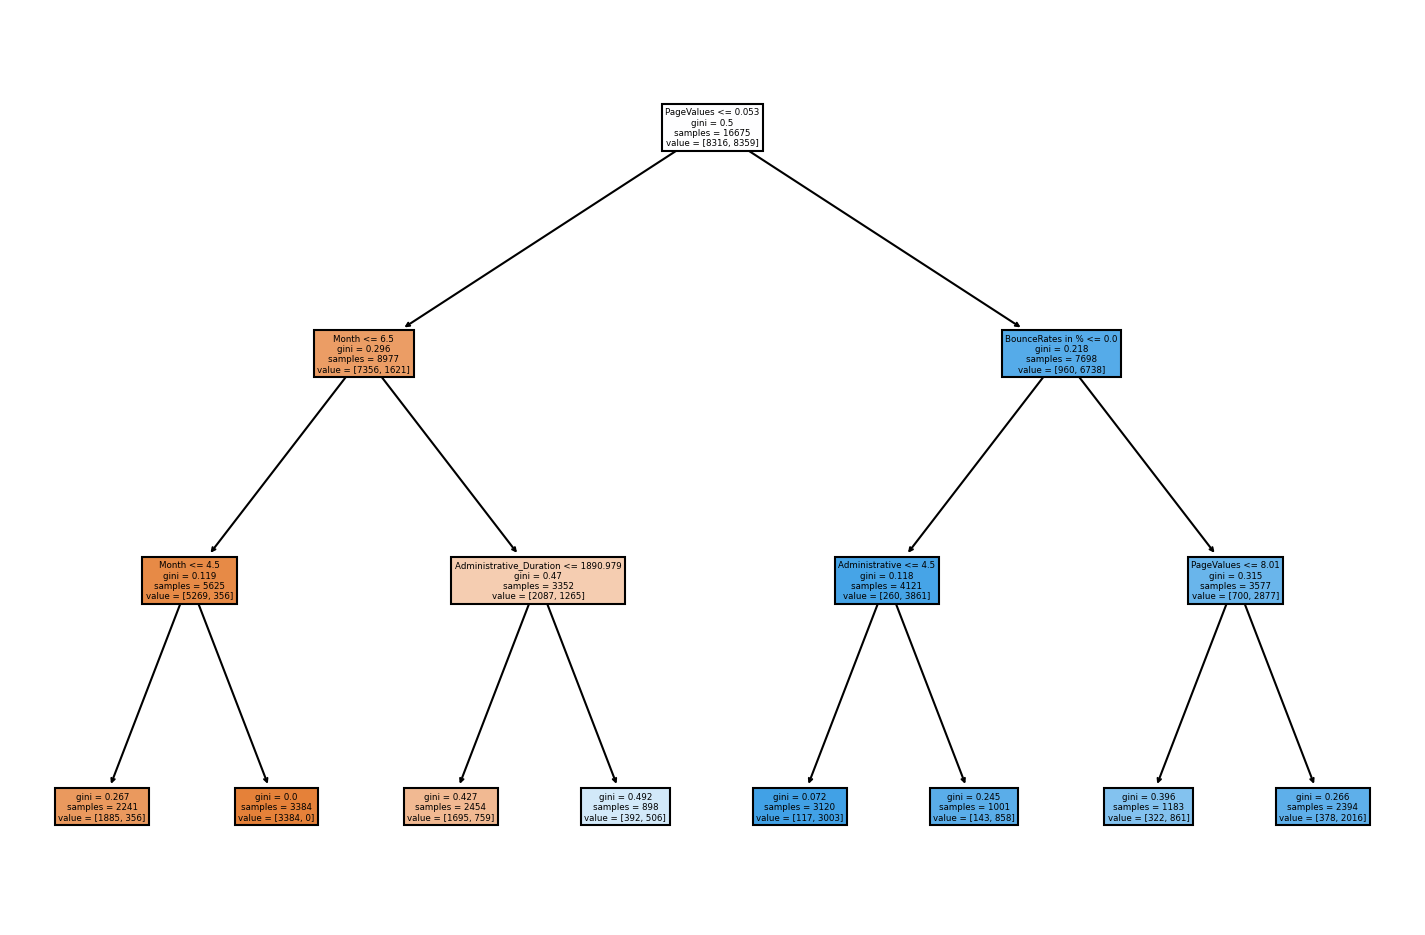

In [288]:
report_model(pruned_tree)

In [289]:
pruned_tree5=DecisionTreeClassifier(max_depth=5)
pruned_tree5.fit(X_train_bal2,Y_train_bal2)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2106
           1       0.85      0.86      0.86      2063

    accuracy                           0.86      4169
   macro avg       0.86      0.86      0.86      4169
weighted avg       0.86      0.86      0.86      4169





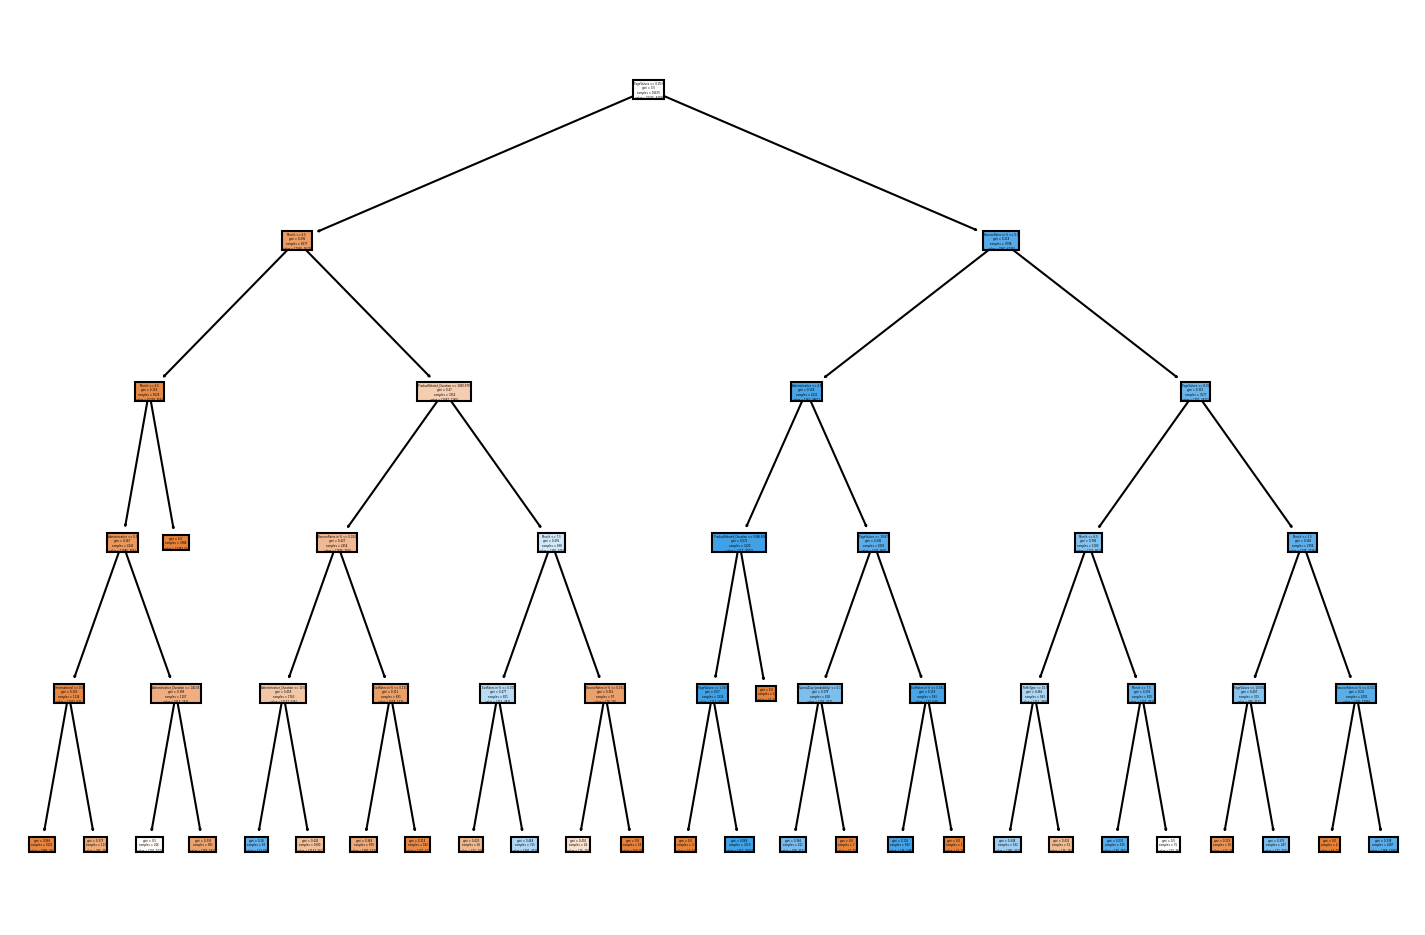

In [290]:
report_model(pruned_tree5)